<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Людмила! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Описание данных**  
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.  
  
сalls — количество звонков,  
minutes — суммарная длительность звонков в минутах,  
messages — количество sms-сообщений,  
mb_used — израсходованный интернет-трафик в Мб,  
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## 1. Откройте и изучите файл

In [1]:
# код ревьюера
# !pip install pandas_profiling

In [2]:
# !pip install ipython-autotime

In [3]:
# Загружаем библиотеки
import pandas as pd
import pandas_profiling
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import time
import timeit
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  
    
    Привет, Марат!  
    Мне очень понравиось твое ревью за то, что делишься советами, обращаешь внимание на многое и делишься ресурсами.  
    Спасибо!
    Добавила ссылки в настольные записки, часть прочла.
    Постараюсь включать !pip install-льные вещи в код.  
    Чаек попить можно успеть, пару раз по 2 минуты... итого около 15)
    Учла многие твои рекомендации, основной баг починила и кое-что добавила (с целью попробовать):  
        -tqdm  
        -%%time  
        -model_tree_plot  
        -feature_importances_ 
        -GridSearchCV
    
Много вопросов... ответь, пожалуйта, на что хватит терпения, или направь на ресурс, который посчитаешь нужным.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Людмила!
    
    
    
    
Сразу замечу^ pandas_profiling и ipython-autotime ты погружаешься через pip install, То есть это сторонние библиотеки, согласно pep8 это значит что мы их ставим в конце когда делаем import



</div>


In [4]:
# Открываем данные
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('C:/my/Яндекс Практикум Курс Data Scientist/SPRINT 9/DS S9 PROJECT/users_behavior.csv')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.

</div>

In [5]:
# Построим матрицу рассеяния
#pd.plotting.scatter_matrix(data, diagonal='kde', figsize=(12,12),  color='orange', alpha = 0.4)
#plt.show()

In [6]:
# Тепловая карта матрицы корреляций между признаками
#matrix = np.triu(data.corr())
#sns.heatmap(data.corr(), annot=True, mask=matrix)
#plt.show()

In [7]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Удаляем из данных столбец minutes
data = data.drop('minutes', axis=1)
data.head(1)

,calls,messages,mb_used,is_ultra
0,40.0,83.0,19915.42,0


## Вывод 1
Признаки calls и mb_used близки к нормальному распределению.  
Признак minutes имеет большой выброс в районе нуля - многие пользователи не используют сообщения.  
Наблюдаем линейную положительную зависимость признаков calls и minutes - они взаимозаменяемы.  
Поэтому удалили признак minutes.  
На тариф "Ультра" приходится 30% пользователей. Данные несбалансированы.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.

И проверить целевой признак на сбалансированность хороший ход, это по сути решение бонусное задание сразу.  Тема дисбаланса как раз тема следующего проекта, тут можно [почитать](https://dyakonov.org/2021/05/27/imbalance/) заранее зачем мы обращаем внимание на это. А [тут](https://habr.com/ru/post/349078/) так ли он страшен  ))

Ты посмотрел корреляцию, в частности видим высокое значение между minutes и calls. Знаешь что такое мультиколлинеарность и какие два типа проблемы она вызывает
    
    

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  

    Спасибо!

## 2. Разбейте данные на выборки

In [9]:
# Формируем таблицы: целевой признак и нецелевые признаки
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

In [10]:
# Делим исходные данные на обучающую, валидационную и тестовую выборки
#features_trains, features_valid, features_test, target_trains, target_valid, target_test = train_valid_test_split(
#    data, 'is_ultra', train_size=0.6, valid_size=0.2, test_size=0.2, random_state=12345, stratify)

In [11]:
# Делим исходные данные на обучающую, валидационную и тестовую выборки
features_trains, features_test, target_trains, target_test = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=12345,
    stratify=target
)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_trains, target_trains, 
    test_size=0.25, 
    random_state=12345
)

In [12]:
# Смотрим размеры полученных выборок
features_train.shape, features_valid.shape, features_test.shape, target_train.shape, target_valid.shape, target_test.shape

((1928, 3), (643, 3), (643, 3), (1928,), (643,), (643,))

In [13]:
# Зададим имя выборкам
features_train.name = 'features_train'
features_test.name = 'features_test'
features_valid.name = 'features_valid'
target_train.name = 'targets_train'
target_test.name = 'targets_test'
target_valid.name = 'targets_valid'

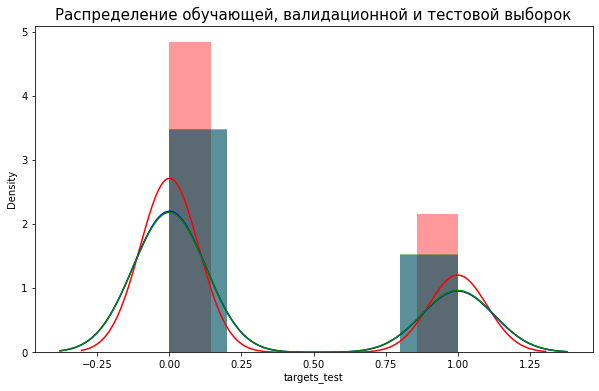

In [14]:
# Посмотрим на распределение выборок
plt.figure(figsize=(10,6))
plt.title('Распределение обучающей, валидационной и тестовой выборок',fontsize=15)
sns.distplot(target_train, color='red')
sns.distplot(target_valid, color='blue')
sns.distplot(target_test, color='green')
plt.show()

In [15]:
display(features_train.head(1))

,calls,messages,mb_used
492,164.0,137.0,21247.07


In [16]:
display(target_train.head(2))

492     1
2108    0
Name: targets_train, dtype: int64

## Вывод 2  
Исходные данные были разбиты на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Размеры выборок получились достаточные для исследования и их расределения схожи.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!

Здорово что проконтролировано разбиение (можно с помощью .shape,  можно .len)

Молодец что знаешь и используешь stratify


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  

    Спасибо!
    Как раз по stratify вопрос: есть ли возможность использовать в train_valid_test_split? Может внутри функции уже реализовано? Не нашла информацю и не стала использовать, тк хотелось применить стратификацию.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:

Если не нашла в документации значит пока не реализовано.  Возможно в следующих обновлениях

</div>


## 3. Исследуем качество разных моделей

### 3.1 Модель "Дерево решений"

In [17]:
%%time
# Измеряем время выполнения ячейки - подбора модели
#Создаем счетчики и списки для заполлнения параметров при выборе лучшей модели
best_model_DTC = None
best_accur_DTC = 0

# Создаем пустые списки для заполнения их оценками качества прогноза обучающей и проверочной 
# выборок при разных значениях глубины дерева для просмотра на переобученность/недообученность модели
# Если правильность предсказаний резко будет отличаться при достаточно высоких значениях качества, то модель переобучена
# Если качество будет у обоих выборок низко - недообучена
accur_tr_DTC = [] 
accur_val_DTC = []
depth_DTC = []

# Для каждой глубины дерева обучаем модель Дерево решений, проверяем ее качество на обучающей и валидационной выборках
# и выбираем лучшую модель и ее качество
for depth in range(1, 33, 2): # Задаем диапазон глубины дерева (с шагом 2) и перебирая гиперпараметр глубины в цикле
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DTC.fit(features_train, target_train) 
    predict_train = model_DTC.predict(features_train)
    accur_train_DTC = accuracy_score(target_train, predict_train)
    predict_valid = model_DTC.predict(features_valid) # предсказание и качество модели на незнакомой выборке 
    accur_valid_DTC = accuracy_score(target_valid, predict_valid) #  доля правильных ответов на незнакомой выборке

    accur_tr_DTC.append(round(accur_train_DTC,3)) # Заполняем список оценок качества прогноза обучающей выборки
    accur_val_DTC.append(round(accur_valid_DTC,3)) # Аналогично - для проверочной (валидационной) 
    depth_DTC.append(depth)

    if accur_valid_DTC > best_accur_DTC:
        best_model_DTC = model_DTC
        best_accur_DTC = accur_valid_DTC   

Wall time: 233 ms


In [18]:
# Выводим таблицу качества и параметры лучшей модели
DTC_list_acc = pd.DataFrame({'accur_train_DTC': accur_tr_DTC, 'accur_valid_DTC': accur_val_DTC}, index=depth_DTC)
display(DTC_list_acc)    
print("Лучшая модель:", best_model_DTC, '\n', " Качество (accuracy) лучшей модели:", round(best_accur_DTC,3))

,accur_train_DTC,accur_valid_DTC
1,0.748,0.773
3,0.798,0.782
5,0.823,0.801
7,0.853,0.788
9,0.881,0.779
11,0.904,0.770
13,0.925,0.765
15,0.953,0.733
17,0.977,0.712
19,0.994,0.695


Лучшая модель: DecisionTreeClassifier(max_depth=5, random_state=12345) 
  Качество (accuracy) лучшей модели: 0.801


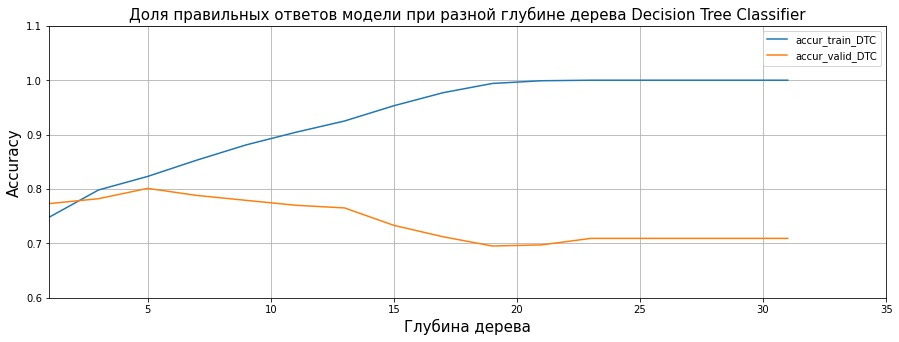

In [19]:
# График зависимости от глубины дерева долей правильных тветов модели на обученной и новой выборках
DTC_list_acc.plot(figsize=(15,5))
plt.xlim(1,35)
plt.ylim(0.6,1.1)
plt.xlabel('Глубина дерева', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.title('Доля правильных ответов модели при разной глубине дерева Decision Tree Classifier',fontsize=15)
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле


Отличный график на котором мы можем видеть переобучение



<div class="alert alert-warning">


Совет: 




- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  

    Спасибо за совет, получилось)
    Верно ли, что первый вопрос у дерева начинается с более важного признака (для тестовой модели - количество мб - колонка с признаком 2).     

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

tree_plot - теперь заказчику можно обьяснить как примерно модель принимает решение, один из плюсов DT.



<div class="alert alert-warning">


Совет:


- Алгоритмом при построении дерева жадный - то есть модель смотрит на один шаг вперёд и делает сплит, у которого будет оптимальная энтропию. Так что да, в каком то смысле можно сказать что   количество мб самый важный. Но с этим можно и поспорить. 
    
    
- Так красивей (схема)
    
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(35,20))
    _ = tree.plot_tree(best_model_tree, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15,
                   max_depth = 3     # Это чтобы прорисовывало 3 уровня, не глубже
                      )
    
    
    

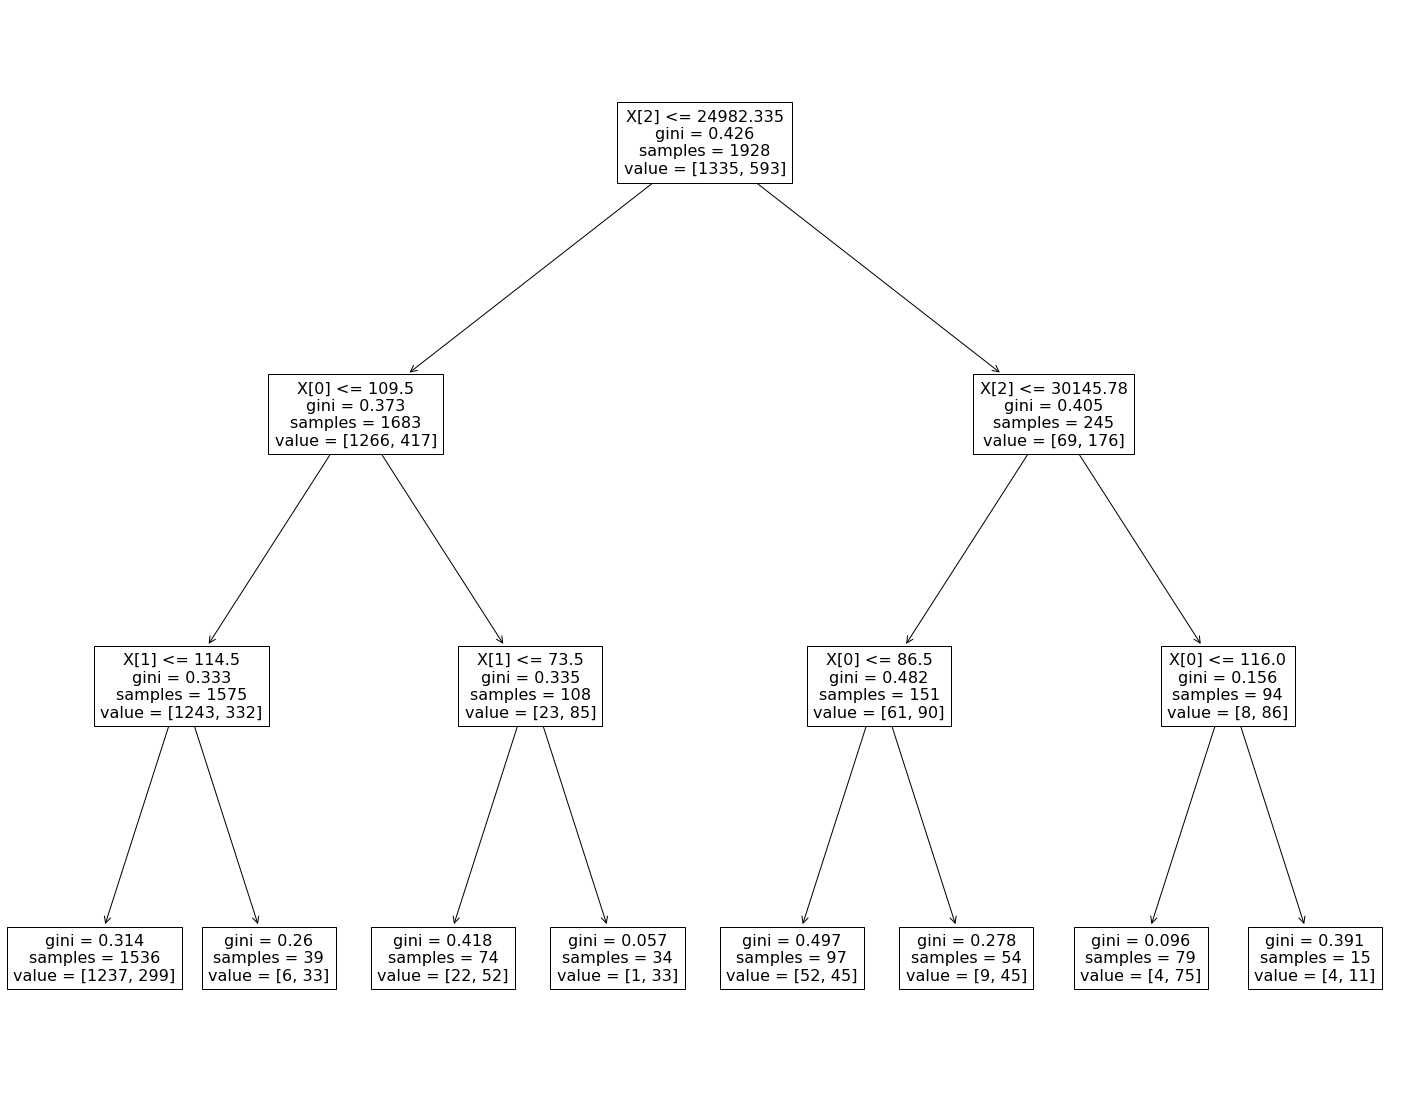

In [20]:
# График решения дерева
model_tree_plot = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_tree_plot.fit(features_train, target_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree_plot)

In [21]:
# Функция важности признаков для модели
def plot_feature_importances_(model):
    n_features = features_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features_train, fontsize=13)
    plt.xlabel("Важность признака", fontsize=15)
    plt.ylabel("Признаки", fontsize=15)

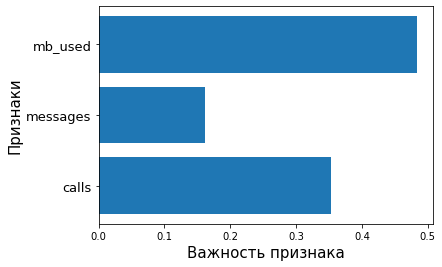

In [22]:
# Важность признаков для model_tree_plot
plot_feature_importances_(model_tree_plot)

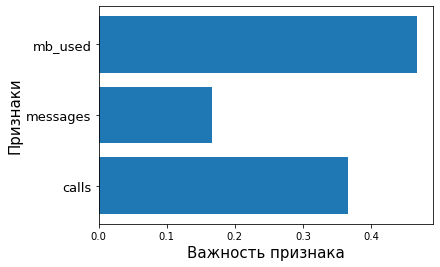

In [23]:
# Важность признаков для best_model_DTC
plot_feature_importances_(best_model_DTC)

### 3.2 Модель "Случайный лес"

In [24]:
# Создаем счетчики и списки для для заполлнения параметров при выборе лучшей модели
best_model_RFC = None
best_accur_RFC = 0
accur_tr_RFC = [] 
accur_val_RFC = []
depth_RFC = []

In [25]:
%%time
for depth in range(1, 30, 2): # Диапазон глубины дерева
    for est in range(50, 400, 50): # Диапазон количества деревьев
        model_RFC = RandomForestClassifier(random_state=12345, n_estimators= est, max_depth = depth) # создаем экземпляр модели
        model_RFC.fit(features_train, target_train) # обучаем модель
        predict_train = model_RFC.predict(features_train) # предсказание модели на тренировочной выборке
        accur_train_RFC = accuracy_score(target_train, predict_train) # доля правильных ответов на тренировочной выборке
        predict_valid = model_RFC.predict(features_valid) # предсказание и качество модели на незнакомой валидационной выборке 
        accur_valid_RFC = accuracy_score(target_valid, predict_valid) # доля правильных ответов на незнакомой выборке
       
        if accur_valid_RFC > best_accur_RFC:  # Выбираем лучшее качество и гиперпараметры модели на валидационной выборке 
            best_model_RFC = model_RFC
            best_accur_RFC = accur_valid_RFC
            est_RFC = est
            accur_tr_RFC.append(round(accur_train_RFC,3)) # Заполняем список оценок качества прогноза обучающей выборки
            accur_val_RFC.append(round(accur_valid_RFC,3)) # Аналогично - для проверочной (валидационной) 
            depth_RFC.append(depth)

Wall time: 1min 46s


In [26]:
RFC_list_acc = pd.DataFrame({'accur_train_RFC': accur_tr_RFC, 'accur_valid_RFC': accur_val_RFC}, index=depth_RFC)
display(RFC_list_acc)    
print("Лучшая модель:", best_model_RFC, '\n', 'Количество деревьев лучшей модели:' , est, '\n', \
      "Качество (accuracy) лучшей модели:", round(best_accur_RFC,3))       
  

,accur_train_RFC,accur_valid_RFC
1,0.729,0.750
1,0.729,0.751
1,0.729,0.753
3,0.801,0.793
3,0.802,0.798
5,0.820,0.799
7,0.848,0.804
7,0.850,0.806
9,0.883,0.807
9,0.884,0.810


Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=250, random_state=12345) 
 Количество деревьев лучшей модели: 350 
 Качество (accuracy) лучшей модели: 0.81


In [27]:
"""%%time
model_RFC_GS = RandomForestClassifier(random_state=12345)
param_grid = {
    'n_estimators': range(50, 400, 50),
    'max_depth': range(1, 30, 2)
}
best_model_RFC_GS = GridSearchCV(estimator=model_RFC_GS, param_grid=param_grid, cv=4)
best_model_RFC_GS.fit(features_trains, target_trains)
predict_test_GS = best_model_RFC_GS.predict(features_test) # предсказание модели на тестовой выборке
accur_test_RFC_GS = accuracy_score(target_test, predict_test_GS)
    
print (best_model_RFC_GS.best_params_, '\n', round(accur_test_RFC_GS, 3))"""

"%%time\nmodel_RFC_GS = RandomForestClassifier(random_state=12345)\nparam_grid = {\n    'n_estimators': range(50, 400, 50),\n    'max_depth': range(1, 30, 2)\n}\nbest_model_RFC_GS = GridSearchCV(estimator=model_RFC_GS, param_grid=param_grid, cv=4)\nbest_model_RFC_GS.fit(features_trains, target_trains)\npredict_test_GS = best_model_RFC_GS.predict(features_test) # предсказание модели на тестовой выборке\naccur_test_RFC_GS = accuracy_score(target_test, predict_test_GS)\n    \nprint (best_model_RFC_GS.best_params_, '\n', round(accur_test_RFC_GS, 3))"

In [28]:
%%time
for i in tqdm(range(10)):
    model_RFC_GS = RandomForestClassifier(random_state=12345)
    param_grid = { 
        'n_estimators': range(250, 350, 50),
        'max_depth': range(9, 11, 2)
        }

    best_model_RFC_GS = GridSearchCV(estimator=model_RFC_GS, param_grid=param_grid, cv=4)
    best_model_RFC_GS.fit(features_trains, target_trains)

    predict_test_GS = best_model_RFC_GS.predict(features_test) # предсказание модели на тестовой выборке
    accur_test_RFC_GS = accuracy_score(target_test, predict_test_GS)
    pass
print (best_model_RFC_GS.best_params_, '\n', round(accur_test_RFC_GS, 3))

100%|██████████████████████████████████████████| 10/10 [01:42<00:00, 10.29s/it]

{'max_depth': 9, 'n_estimators': 300} 
 0.816
Wall time: 1min 42s


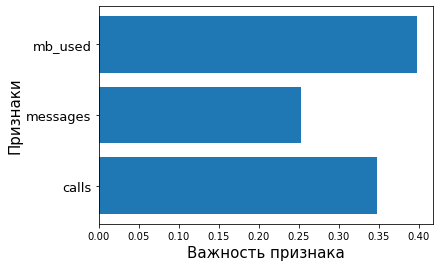

In [29]:
# Важность признаков для best_model_RFC
plot_feature_importances_(best_model_RFC)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
    
По большему числу гиперпараметров перебор -   тем лучше метрика. Случайный лес мощная модель и по-нему действительно стоит поперебирать несколько гиперпораметров. Здорово   




<div class="alert alert-warning">


Совет: 

- Здорово что использован перебор не по одному гиперпараметру. Поэтому посоветую поизучать sklearn-ий GreedSearchCV. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_. Это тема будущих теоретических занятий, но если есть время можешь сразу попробовать.




- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))  А еще есть tqdm, показывает на каком этапе у нас работа в цикле происходит



<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  

    Спасибо за совет!  
    Попробовала со временем - классно вышло, есть подтверждение, что RFC дольше ищет лучшие параметры). Нам на вебинаре показывали, что такое существует, без описания окружающих плясок с бубном... Пробовала перед первой отправкой сделать - срабатывало только %time, а она считает только время выполнения строки, а не ячейки, сейчас разобралась, что нужно было помимо установки ipython-autotime импортировать timeit.  
    
    При использовании tqdm время на выбор модели увеличивалось в 10 раз в ячейке GridSearchCV, где эта функция наиболее нужна, поэтому использовала ее в быстро обучающейся модели, чтобы была попробовать, но не занимала много времени при проверке. Подскажи, как ее правильно нужно было использовать?  
    
    
    Попробовала GridSearchCV, долго висит обучается при диапазонах гиперпараметров ручного поиска. При других гиперпараметрах сравнивать, думаю, бесполезно, зато пробный вариант сработал.  
    Прокомментируй пожалуйста, и, может, какой-то доступный для понимания ресурс с примерами есть или видео?
    
Пока не понимаю, что тут происходит: svc = svm.SVC() 
    
    
>>> from sklearn import svm, datasets  
>>> from sklearn.model_selection import GridSearchCV  
>>> iris = datasets.load_iris()  
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  
>>> svc = svm.SVC()  
>>> clf = GridSearchCV(svc, parameters)  
>>> clf.fit(iris.data, iris.target)  
GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})  
>>> sorted(clf.cv_results_.keys())  

первоисточник    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html    

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Здорово что испробован GridSearchCV и датасет подан верный (train+valid)
    
Но для меня загадка Зачем ты поставила GS в цикл.


Ты не беспокойся, если что непонятно, эту обёртку вы будете изучать позднее. Но могу сказать сразу что происходит тоже самое когда ты используешь обычные циклы, только GS это делает внутри себя    
    
<div class="alert alert-warning">

Совет:

    
Я напишу тезисно главные моменты которые Надеюсь тебе помогут разобраться    
    

- Не надо воспринимать  GS как способ получить .best_params_, чтобы подставить их в модель и обучить на них. GS это сделал уже и модельку положил тут: .best_estimator_
    
    
    
- метрику на валидаци смотрим тут  - .best_score_ 




    
- Насчет долго: первое он делает разбивку 5 раз, и каждый раз все пересчитывает (cv=5), во вторых он после того как найдет лучшие гиперпараметры, дообучает модель на полном датасете, еще и данные собирает о обучении. Так что если он долго считает то не потому что плохо оптимизирован, с этим у него все в порядке, а потому что он делает очень много полезной работы.    
   



- В случаи с GS тоже можно отлично строить графики, глянь в атрибут .cv_results_, там собрана информация о процессе обучения, можно оттуда вытащить данные, чтобы построить график.



- Благодаря кроссвалидации (cv = 5), модель полученная с помощью GridSearchCV будет стабильней (меньше рандома, потому что обучение - валидация шла на разных обьектах) и на тесте скорей всего покажет лучший результат


    
Подытожим - GS все за нас сделал, нужно пользоваться  .best_score_ (чтобы отобрать лучшую модель среди прочих) и  .best_estimator_  (чтобы прогнозировать на тестовой)
    
    


</div>


### 3.3 Модель "Логистическая регрессия"

In [30]:
%%time
# Исследуем модель "Логистическая регрессия"
for i in tqdm(range(10)):
    model_LR = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=500) 
    model_LR.fit(features_train, target_train)
    predict_train = model_LR.predict(features_train)
    accuracy_train_LR = accuracy_score(target_train, predict_train)
    predict_valid = model_LR.predict(features_valid) # предсказание и качество модели на незнакомой выборке 
    accur_valid_LR = accuracy_score(target_valid, predict_valid) # доля правильных ответов на незнакомой выборке
    pass
print("Качество (accuracy) модели 'Логистическая регрессия': ", '\n','на обучающей выборке',  round(accuracy_train_LR,3),\
          '\n', 'на валидационной выборке', round(accur_valid_LR,3)) 

100%|██████████████████████████████████████████| 10/10 [00:03<00:00,  2.97it/s]

Качество (accuracy) модели 'Логистическая регрессия':  
 на обучающей выборке 0.751 
 на валидационной выборке 0.745
Wall time: 3.43 s


## Вывод 3  

Исследование качества разных моделей дало такой резуьтат долей правильных ответов на валидационной выборке.  

"Дерево решений" 80% 
Время на поиск лучшей модели составило 358 ms.
DecisionTreeClassifier(max_depth=5, random_state=12345) 
Исследованы 16 моделей с диапазоном глубины дерева от 1 до 32 с шагом 2. В обучающей выбороке при увеличении глубины дерева увеличивалась точность ответов, но на валидационной выборке доля правильных ответов начала снижаться после пика при значении  глубины 5. То есть с дальнейшим увеличением глубины дерева увеличивалось переобучение модели. 

"Случайный лес" 81%  
Время на поиск лучшей модели - 1min 24s.
RandomForestClassifier(max_depth=9,  n_estimators= 350, random_state=12345)
Исследованы 112 моделей с диапазоном глубины дерева от 1 до 32 с шагом 2 для 7 деревьев - от 50 до 400 с шагом 50.
Наилучшее значение показала модель с 350 деревьями с глубиной дерева 9. На обучающей выборке модель редсказала с точностью 88%, на валидационной не критично меньше, поэтому можно сказать, что модель не недообучилась и не переобучилась.

"Логистическая регрессия" 75%  
Время обучения модели - 82 ms.
LogisticRegression(random_state=12345, solver='lbfgs', max_iter=500)
Исследована 1 модель. Различие между точностью на обучающей и валидационной выборках незначительное.
 
Среди рассмотренных моделей наилучший показатель доли правильных ответов на валидационной выборке показала модель "Случайный лес", при этом она будет занимать боьлше времени на обучение.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  
    
Попробую стать миллионером...  
    
1) Переобучение, модель сильно подогнана к обучающей выборке, на train будет расти до 1 (если метрика accuracy)  

2) Потому что класс с наибольшей вероятностью прогнозируется по усредненному значению вероятностей от результатов прогноза нескольких деревьев, а не одного (при этом каждое дерево строится на своей подвыборке бутстрепом, что как бы добавляет данных, и при расщеплениях добавляется случайность)  
3) Парадокс видмо есть, так как это модель классификации, хоть и в названии присутствует слово регрессия
4) звонок другу, посоветуй, пожалуйста, где все это структорировано и в доступном виде почитать можно?

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. Можешь почитать учебник ШАД


</div>

## 4. Проверка модели  на тестовой выборке

In [31]:
# Обучим лучшую модель best_model_RFC на объединенных тестовой+проверочной выборках и 
# проверим качество предсказаний
best_model_RFC.fit(features_trains, target_trains)     
predict_test = best_model_RFC.predict(features_test) # предсказание модели на тестовой выборке
accur_test = accuracy_score(target_test, predict_test) # считаем качество прогноза модели
print(f'Качество модели {best_model_RFC} на тестовой выборке :{100*round(accur_test,3)} %')


Качество модели RandomForestClassifier(max_depth=9, n_estimators=250, random_state=12345) на тестовой выборке :81.5 %




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Тобой подбиралась лучшая комбинация не по одному гиперпараметру и вот он результат!






</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>




Ошибка:




К данному этапу мы должны подойти с одной выбранной моделью. Людмила, о логике использования датасетов:
    




1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров).  И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Использование тестовой выборки, чтобы еще раз посмотреть на модели - это нарушение логической цепочки моделирования. 

А в таком виде, может сложиться впечатление что мы на тестовой по прежнему что то выбираем, но выбор сделан, и если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала.
    
 [Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

<div class="alert alert-warning">
   
Совет: 

- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.
</div>


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента</b>  

Исправила: теперь на тест отправлена одна лучшая модель.  
"Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке" - 
это уже и было сделано, у меня сплиты отличаются в одну буковку s: features_trainS = тренировочной + валидационной, а features_train = тренировочная. Очень хорошо, что такие советы даешь и обращаешь на это внимание.  

Очень не хватало знания про смысл использования 3х выборок, четко сформулированную логику на понятном языке нашла только в одной книге, благодаря чему общий смысл для работы над проектом сложился, нам бы вот в теорию кидали пару доп. источников или общую структуру и логику работы в ML опиывали сразу. Пока тоько можно по оглавлению книг что-то воображать. Это как в изучении языков, пока не показали таблицу времен, трудновато понимать, зачем многократно тренировали прибавлять окончание -ed к глаголам, например, фокус смещен на это, а не зачем это делать вообще. Времени не хватает из океана информамции добывать нужную без понимания структуры, общей схемы, чтобы четче понимать, что именно искать.   
    
    Благодарна, что скинул хорошие статьи!   
    

Здесь проверки ради решила выбранные 3 лучшие модели каждого классификатора посмотреть, так же отранжируются между собой по качеству или нет на незнакомых данных. Опыта и знания пока не хватает, чтобы этого не делать, вот ты подсказал). Каша и отсутствие структуры и знаний еще присутствуют.  
Отсюда вопросы... подскажи, пожалуйста:  
    
    1) Случаются ли большие отличия в качестве между результатом на валидационной и тестовой выборке? Как интерпретировать, если на тестовой лучше намного/ненамного или хуже, чем на валидационной? (размытые представления интерпретации порога  переобучения). Верно я понимаю, что если лучшая модель показала на тесте хуже результат, чем на валидационной, но при этом выше требуемого, то модель можно оставлять в работе, а если ни одна модель не дотягивает до заданного качества, то моделирование продолжается подборо гиперпараметров? 
    2) По переобучению и недообучению: только критерий сравнения accuracy на тренировочной и проверочной выборках используется, что-то есть еще?  
    3) Какие отличия в качестве между обучающей и проверочной считать большими? У меня была разница в 8% - много это или мало? Аналогично при проверке на адеквотность при сравнении с предсказанием примитивной модели, что есть большое отличие?   
    4) "если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала" - требуемое качество заранее задано? Кем обычно в реальном мире? Как его определять - есть какие-то общепринятые значения?
    5) Как понять что есть дисбаланс классов, насколько велики должны быть различия в % например или общепринятые диапазоны?
    6) Есть ли ресурс (любой), на котором реальные задачи с разбором решения по теме DS DA? Что-то подобное.
    7) Как задавать вопросы после принятия проекта?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


features_trainS - не заметил, извиняюсь )

Попробую ответить, но лучше такие вопросы задавать куратору или преподавателю, это их работа.

1) Случаются ли большие отличия в качестве между результатом на валидационной и тестовой выборке? Как интерпретировать, если на тестовой лучше намного/ненамного или хуже, чем на валидационной? (размытые представления интерпретации порога  переобучения). Верно я понимаю, что если лучшая модель показала на тесте хуже результат, чем на валидационной, но при этом выше требуемого, то модель можно оставлять в работе, а если ни одна модель не дотягивает до заданного качества, то моделирование продолжается подборо гиперпараметров? 
    
- Я бы не стала уделять этому большое внимание потому что есть вопрос рандомного сплита. Бывает так что на тесте метрика выше чем на валидации. Почему?! Такой вот сплит     
    
2) По переобучению и недообучению: только критерий сравнения accuracy на тренировочной и проверочной выборках используется, что-то есть еще?  
    
    
- Если посмотреть определение переобучение нет обучения, то получается именно так.     
    
3) Какие отличия в качестве между обучающей и проверочной считать большими? У меня была разница в 8% - много это или мало? Аналогично при проверке на адеквотность при сравнении с предсказанием примитивной модели, что есть большое отличие?   
    
- У меня нет ответа, и сомневаюсь что существует учебник в котором это цифра выведена. Но коенчно 8% это что то многовато. Также и при сравнении с примитивной моделью, я сомневаюсь что где-то есть цифра, которая указывает много или мало отличаются модели   
    
4) "если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала" - требуемое качество заранее задано? Кем обычно в реальном мире? Как его определять - есть какие-то общепринятые значения?
    
- В реальном мире есть заказчик со своими хотелками. Кто платит деньги тот и определяет требуемую метрику. Никакого общепринятого значение быть не может, датасеты все разные, задачи все разные. Для интереса можешь посмотреть как растет Метрика в задачах  Компьютерного зрения, но это для оценки динамики.    
    
    
5) Как понять что есть дисбаланс классов, насколько велики должны быть различия в % например или общепринятые диапазоны?
    
- Опять же сомневаюсь что существует какая-то строгая цифра. Полагая плюс-минус 10% это в пределах баланса.  Во-вторых проблемы дисбаланса сильно преувеличены
    
6) Есть ли ресурс (любой), на котором реальные задачи с разбором решения по теме DS DA? Что-то подобное.
    
    
- kaggle
    
    
7) Как задавать вопросы после принятия проекта?
    
    
    
- Ревьюерам вообще не стоит задавать теоретические вопросы ) Для этого есть другие люди   ) 

</div>


## Вывод 4
Проверка качества модели "Случайный лес" с наилучшими гиперпараметрами показала долю правильных ответов на тестовой выборке 82%.  
Такая точность достигнута при гиперпараметрах модели: глубина дерева 9 с 350 деревьями.

##  5. (бонус) Проверьте модели на адекватность

In [32]:
# Посмотрим долю правильных ответов прогноза модели, которая всегда предсказывает класс ноль - пользовались только тарифом "Смарт"
dummy = DummyClassifier(strategy='most_frequent').fit(features_trains, target_trains)
dummy_pred = dummy.predict(features_test)
print('Доля правильных ответов: ', 100*round(accuracy_score(target_test, dummy_pred),2),'%')

Доля правильных ответов:  69.0 %


## Вывод 5  
Модели прошли проверку на адекватность, простейшая (dummy) модель, которая всегда предсказывает 
0 имеет долю правильных ответов меньше, чем в рассмотренных лучших моделях.    

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все верно. 

👍 что используешь специальную обертку для проверки на адекватность



## **Общий вывод:**
Были исследованы 3 модели и подобраны их гиперпараметры, показывающие лучшее значение метрики accuracy.

Из 3х моделей лучшей оказалась "Случаный лес": она показала наибольшую долю правильных ответов на проверочной выборке.
На новых (тестовых) данных она показывает 82% точности, которые достигнуты при гиперпараметрах модели: глубина дерева 9 с 350 деревьями.

На втором месте по оценке доли правильных ответов на проверочной выборке - модель "Дерево решений" - ее accuracy составило 80% при глубине дерева 5.
На третьем месте - модель "Логистическая регрессия" -  ее accuracy составило 75%. 

У выбранных моделей удалось подобрать гиперпараметры так, чтобы доля правильных ответов (accuracy) достигла значения более 75%.

Рассматриваемые модели прошли проверку на адекватность. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Людмила, здорово что в конце расписаны все этапы работы. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.



</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Людмила, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, с комментированием кода тоже никаких проблем нет, твоих объяснений достаточно для понимания коллегами хода твоих мыслей. 

Некоторые пункты выполнены в большем чем требуется обьеме.


Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 


  
- посоветовал посмотреть в сторону GridSearchCV
- как можно улучшить результаты 


 
    
Обязательное к исправлению:



- к моменту проверки качества прогноза на тесте, приходим с уже одной выбранной моделью с лучшими гиперпараметрами выбранными на валидации

    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 





</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Людмила. Желаю успехов в дальнейшей учебе!



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [х] Весь код исполняется без ошибок
- [х] Ячейки с кодом расположены в порядке исполнения
- [х] Выполнено задание 1: данные загружены и изучены
- [х] Выполнено задание 2: данные разбиты на три выборки
- [х] Выполнено задание 3: проведено исследование моделей
    - [х] Рассмотрено больше одной модели
    - [х] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [х] Написаны выводы по результатам исследования
- [х] Выполнено задание 3: Проведено тестирование
- [х] Удалось достичь accuracy не меньше 0.75
